<center>
    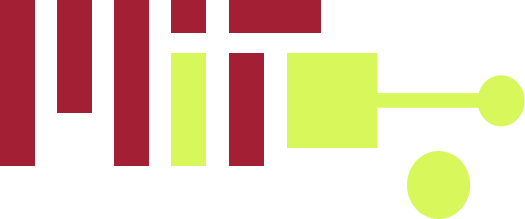
</center>



<!-- 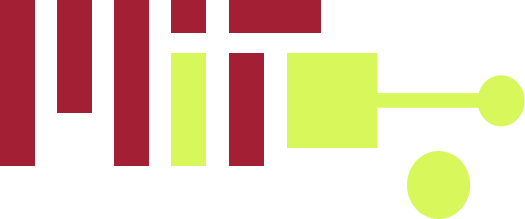 -->

# Classiq Challenge - Gaussian State Prepration

**We now have a new Web-SDK with a Python environment set up for you, along with a personal workspace where all your work will be saved!**  
Please upload this challenge notebook to the Web-SDK on our [platform](https://platform.classiq.io/) in your persistent user workspace and try solving it there.

## Welcome to the Classiq challenge of the MIT iQuHack Hackathon 2025!

### Motivation

**State Preparation** is a cornerstone of quantum algorithms and applications, enabling the initialization of quantum systems into specific states as a starting point for subsequent operations. Its efficiency directly impacts the accuracy and scalability of quantum computations.

A particular interest is the **Gaussian state preparation**, which is essential for simulating physical systems and tackling problems in quantum chemistry, machine learning, and optimization. Gaussian states, characterized by their Gaussian-shaped wavefunctions, are powerful tools for encoding probability distributions and modeling quantum systems.

With the scaling of quantum hardware, achieving efficient and precise Gaussian state preparation could improve the costs of quantum algorithms and enhance impactful applications like option pricing in finance, molecular simulations in quantum chemistry, and data analysis in machine learning, among others.

---

**This Jupyter notebook serves as the framework for the challenge.**  
Please read it fully and carefully to understand the scope of the challenge before you start solving the problem using **Classiq**.

The notebook is divided into two parts:  
1. **The challenge**: This includes the problem you need to solve, the required format, instructions to self-check your solution, and how to export your algorithm for submission.
2. **Results Evaluation**: Here are the functions we will use to evaluate the performance of your solutions.
3. **Submission**: Use the provided function to save your solution in the relevant format and submit it through the submission link.

\
**Your resources:**
- The Classiq IDE at [platform.classiq.io](https://platform.classiq.io/).
- The [Classiq Library](https://github.com/Classiq/classiq-library) – the largest collection of quantum functions, algorithms, and tutorials.
- [Classiq's documentation](https://docs.classiq.io/latest/) and the [Classiq101](https://docs.classiq.io/latest/classiq_101/) for quick onboarding to high-level quantum modelling concepts.
- The [Classiq Community Slack](https://short.classiq.io/join-slack) – where the Classiq team will address any questions, including implementation-related queries.
- The Warm-Up session is highly recommended as well!

\
**Important:**  
- Do not modify the cells variables or functions used for auto-saving and grading, as this may prevent us from validating and grading your solutions.
- When reaching out to us on the Classiq Community Slack, **please ensure your message is clear and includes all relevant information**. State the **topic of your request in the main message** and provide additional details, including the full error message, in a **thread**. The best channel is the [support-and-questions](https://classiq-community.slack.com/archives/C04L4RC85U4)

**Good luck!**

---

### Your Challange 

**Your challenge is to prepare a Gaussian state in the symmetrical domain $x \in [-2, 2)$.**

To complete this challenge, follow the instructions below:

#### Target State: The Gaussian State Representation

The Gaussian state is defined as:

$$
|x_0\rangle_N = |0\rangle_N \longrightarrow \sum_{|x\rangle_N} \sqrt{G(x)} |x\rangle_N
$$

Where $G(x)$ is represented as a vector:

$$
{G}(x_i) = \frac{\exp(-\lambda \cdot {x_i}^2)}{\sum_{x' \in \text{domain}} \exp(-\lambda \cdot (x')^2)} \text{, for } x_i \in \text{domain}
$$


- $G(x)$ is the normalized Gaussian vector across the discrete domain.  
- $\vec{x}$ represents the set of discrete points in the domain.  
- $\lambda$ represents the decay rate. In the code, it is represented by the variable $\text{EXP\_RATE}$, which controls the spread of the Gaussian.
- The denominator ensures normalization across the entire domain.

#### Domain Specification

Set the domain to $x \in [-2, 2)$, with the `resolution` variable controlling the granularity.

#### Precision and Resolution Control

Use the `resolution` variable to control the precision of $x$. Increasing `resolution` improves discretization without altering the domain boundaries. To achieve this, define `fractional digits = resolution - 2`.

This ensures the domain and granularity remain consistent with the instructions.

---

#### Rules for Implementation

- Follow this notebook and adapt the necessary parts in the appropriate cells.
- **Do not change functions, cells, variable names, or values unless explicitly instructed to do so.**

---

#### Submission Guidelines and Requirements

Your final submission should include:
- Two `.qprog` files, one for each stage, as instructed in this notebook.
- One `.ipynb` file (this notebook with your solution). Please name the file starting with your group name!
- A short paragraph briefly explaining your work.
- **Submit all the files via the [submission page](https://fvrn0h72gwo.typeform.com/to/W4I7N9yl)**.

##### **Stage 1: Achieving a Small MSE**
- **Goal**: Achieve a Mean Squared Error (MSE) smaller than the threshold: $MSE_{\text{threshold}} = 1 \cdot 10^{-7}$.
- **Constraints**:
  - Limited to **18 qubits** as defined by the `create_qprog()` function for the state-vector simulator.
  - The `resolution_stage_1` is fixed at **8**. **Do not modify this value.**
- **Submission**:
  - Your solution for this stage will be evaluated based on the file `your_group__stage_1__resolution_7.qprog` generated by the `save_qprog()` function in the Submission section.

##### **Stage 2: Demonstrating Scalability**
- **Goal**: Demonstrate the scalability of your solution.
  - Increase the `resolution_stage_2` to a value of your choice to showcase the efficient use of resources for higher resolutions.
  - This stage is not expected to be executable on the state-vector simulator, and the `create_qprog()` function imposes the qubit limits by: `max_width=127`.
  The synthesis timeout is extended in this stage to achieve a more scalable solution, as you might see in `create_qprog()`.
- **Submission**:
  - Your solution for this stage will be evaluated based on the file `your_group__stage_2__resolution_##.qprog` generated by the `save_qprog()` function in the Submission section. This part's `resolution` value will automatically determine the `##` part of the file name.
- **Explanation**:
  - Include an explanation of how your algorithm scales, addressing:
    - How the MSE scales with resolution.
    - The complexity of the quantum program (CX count).
    - The size scaling with increasing resolution between stages.
    - Any important decisions made during the implementation.

---

#### Evaluation Criteria: How Your Submission Will Be Graded

Winning teams will be determined by the following:

1. **Performance**: Solutions that achieve results at least as good as the threshold $MSE_{\text{threshold}}$.

2. **Scaling**:
    - Among solutions meeting the threshold, submissions will be evaluated by the size of their quantum program:
      - **Depth** and **CX count** using the `get_metrics()` function for `your_group__stage_1__resolution_7.qprog`.
      - The same parameters will be evaluated for `your_group__stage_2__resolution_##.qprog`, if submitted.

3. **Overall Consideration**: Creativity, efficient use of the Classiq SDK, and the application of high-level functional design concepts. The explanation paragraph, if submitted, will also be taken into account as part of the evaluation.

---

#### **Good luck!**

### If you are not using the Web-SDK:

1. Firstly, if you haven't already, install the Classiq SDK package. If it's already installed, make sure to update it to the latest version.

In [18]:
# !pip install -U classiq

2. Authenticate your device against the Classiq backend:

In [19]:
import classiq

# classiq.authenticate() # Uncoment to authenticate. For the first (local) run only

## The Challenge

### Imports

You might import additional libraries as long as you solve the challenge using primarily Classiq.

In [20]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np

# All the imports needed:
from classiq import *
from classiq.execution import *
from classiq.qmod.symbolic import *

### The Heart of the Code - Build Your Algorithm Here

In [21]:
## TODO: Write Your Functions Here ## (Final)


def create_solution(resolution: int):  # Don't change!
    fraction_digits = resolution - 2  # Don't change!
    EXP_RATE = 1  # Don't change!

    ## TODO: Write Your Functions Here: ##

    # Adapt This Function!
    @qfunc
    def prepare_gaussian(x: QNum):
        hadamard_transform(x)

    return prepare_gaussian

### Utils - Don't Change The Following Cell

The following function would be called later to to synthesize the `.qprog` file for stage 1 & 2

In [22]:
# This function is used to generate the quantum model from the main function for stages 1 & 2 and synthesize it with all the appropriate parameters


def create_qprog(
    prepare_gaussian_function,
    resolution: int,
    num_shots: int = 1,
    optimization_parameter: str = "CX",
    stage=int,
):
    fraction_digits = resolution - 2

    @qfunc
    def main(x: Output[QNum[resolution, SIGNED, fraction_digits]]):
        # Allocate the quantum variable x with the specified resolution
        allocate(x.size, x)

        # Prepare Gaussian state
        prepare_gaussian_function(x)

    # Backend preferences for the state vector simulator
    backend_preferences = ClassiqBackendPreferences(
        backend_name=ClassiqSimulatorBackendNames.SIMULATOR_STATEVECTOR
    )

    # Generate the quantum model with constraints by stage
    if stage == 1:
        qmod = create_model(
            main,
            execution_preferences=ExecutionPreferences(
                num_shots=num_shots, backend_preferences=backend_preferences
            ),
            constraints=Constraints(
                max_width=18, optimization_parameter=optimization_parameter
            ),
        )
    elif stage == 2:
        qmod = create_model(
            main,
            preferences=Preferences(timeout_seconds=1000),
            execution_preferences=ExecutionPreferences(
                num_shots=num_shots, backend_preferences=backend_preferences
            ),
            constraints=Constraints(
                max_width=127, optimization_parameter=optimization_parameter
            ),
        )
    else:
        return "The `stage` variable should be set as Int to be either 1 or 2"

    # Synthesize the quantum program
    qprog = synthesize(qmod)

    return qprog

## Evaluate Your Results

### Quantum Program - Stage 1

<details markdown>
<summary><b>Reminder!</b></summary>

With `backend_name=ClassiqSimulatorBackendNames.SIMULATOR_STATEVECTOR`, you can simulate circuits with up to **18 qubits**. You may use as many of these qubits as needed without affecting your score at this stage. 

The goal is to achieve a **small MSE** (beyond the threshold) while minimizing the **complexity** of your quantum program. Here, "complexity" specifically refers to its **size**, measured by metrics like **depth** and ** count**.

</details>


**Don't Change The Following Cell!**

In [23]:
# Creating stage's 1 `.qprog` file
resolution_stage_1 = 8  # Don't change!
qprog_stage_1 = create_qprog(
    create_solution(resolution_stage_1), resolution_stage_1, stage=1
)

Uncomment to display the quantum program:

In [24]:
# show(qprog_stage_1)

In [25]:
result_stage_1 = execute(qprog_stage_1).get_sample_result()

Uncomment to view the parsed circuit results after executing your algorithm:

In [26]:
# result_stage_1.parsed_state_vector

### Quantum Program - Stage 2

<details markdown>
<summary><b>Reminder!</b></summary>

In Stage 2, you are expected to demonstrate the **scalability** of your algorithm by increasing the `resolution_stage_2` to a value of your choice. This stage is not expected to be executed on the state-vector simulator and is restricted by the **127-qubit limit**, marking the largest QPU commercially available. You can leverage as many qubits as necessary to showcase your solution's efficiency at higher resolutions.

The goal is to highlight your approach's **scalability** and **efficiency** while ensuring the algorithm remains compact. Focus on minimizing the **complexity** of your quantum program, where "complexity" is measured by metrics like **depth** and ** count**. In this challenge,  count will be our measure.

</details>

Set the value of `resolution_stage_2` to your choice! 

In [27]:
# Creating the Stage 2 qprog object
resolution_stage_2 = 4  # Change!
qprog_stage_2 = create_qprog(
    create_solution(resolution_stage_2), resolution_stage_2, stage=2
)

Uncomment to display the quantum program:

In [28]:
# show(qprog_stage_2)

### Evaluation Functions

Here are the grading functions for Stages 1 & 2.\
As mentioned, these functions will serve as the main tools for evaluating your algorithms.\
\
**Don't Change The Following Cell!**

In [29]:
# Stage 1:


def scatter_aggregated_amplitudes_with_theory(
    parsed_state_vector, resolution: int, should_plot: bool = True
):
    """
    Aggregate squared amplitudes by x, sum them, and scatter plot with theoretical distribution.
    Also calculates Mean Squared Error (MSE).

    Parameters:
        res: Parsed state vector results (list of SimulatedState objects).
        exp_rate: Exponential rate for the Gaussian distribution.
        resolution: Number of qubits used in the Gaussian state.
        should_plot: bool that allow you to choose if to plot the solution
    """
    from collections import defaultdict

    fraction_digits = resolution - 2
    EXP_RATE = 1

    # Initialize a dictionary to store sums of squared amplitudes
    amplitude_sums = defaultdict(int)
    for state in parsed_state_vector:
        amplitude_sums[state.state["x"]] += np.abs(state.amplitude) ** 2

    # Prepare data for plotting
    x_values = sorted(amplitude_sums)  # Sort for meaningful plotting
    summed_squared_norms = [amplitude_sums[x] for x in x_values]

    # Generate theoretical Gaussian distribution
    grid = np.linspace(
        -(2 ** (resolution - fraction_digits - 1)),
        2 ** (resolution - fraction_digits - 1) - 2 ** (-fraction_digits),
        2 ** (resolution),
    )

    theoretical_gaussian = np.exp(-EXP_RATE * grid**2)
    theoretical_gaussian /= np.sum(theoretical_gaussian)  # Normalize the Gaussian

    # Interpolate theoretical probabilities at measured points
    interp_func = np.interp(x_values, grid, theoretical_gaussian)
    interpolated_theoretical_prob = interp_func

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((np.array(summed_squared_norms) - interpolated_theoretical_prob) ** 2)
    print("Mean Squared Error (MSE):", mse)

    # Plot measured and theoretical distributions
    if should_plot:
        plt.figure(figsize=(8, 6))
        plt.scatter(
            x_values,
            summed_squared_norms,
            color="blue",
            alpha=0.7,
            label="Measured (Summed Squared Norms)",
        )
        plt.plot(
            grid,
            theoretical_gaussian,
            color="red",
            linewidth=2,
            label="Theoretical Gaussian",
        )
        plt.xlabel("x")
        plt.ylabel("Probability")
        plt.title("Measured vs Theoretical Gaussian")
        plt.grid(True, linestyle="--", alpha=0.7)
        plt.legend()
        plt.tight_layout()
        plt.show()

    return mse

**Don't Change The Following Cell!**

In [30]:
# Stage 2:


def get_metrics(qprog):
    """
    Extract circuit metrics from a quantum program.

    Parameters:
        qprog: The quantum program object.

    Returns:
        dict: A dictionary containing the circuit metrics:
              - "depth": Circuit depth.
              - "width": Circuit width (number of qubits used).
              - "cx_count": Number of CX gates (returns 0 if none are present).
    """

    # Extract metrics
    metrics = {
        "depth": qprog.transpiled_circuit.depth,
        "width": qprog.data.width,
        "cx_count": qprog.transpiled_circuit.count_ops.get(
            "cx", 0
        ),  # Default to 0 if 'cx' not found
    }

    return metrics

### Evaluate the results of stage 1:

Mean Squared Error (MSE): 9.318648858251804e-06


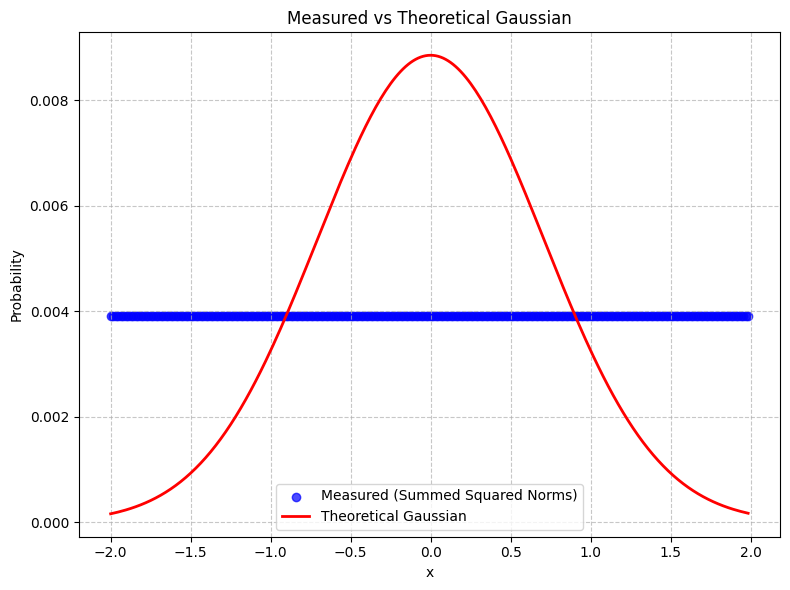

{'depth': 1, 'width': 8, 'cx_count': 0}


In [31]:
mse = scatter_aggregated_amplitudes_with_theory(
    result_stage_1.parsed_state_vector, resolution_stage_1, should_plot=True
)
print(get_metrics(qprog_stage_1))

### Evluate the results of stage 2:

<details markdown>
<summary><b>Reminder!</b></summary>

In Stage 2, you are expected to demonstrate the scalability of your algorithm by synthesizing the highest-resolution algorithm possible.\
Note that **it may exceed the 18-qubit limitation**.

</details>


In [15]:
print(get_metrics(qprog_stage_2))
qprog_stage_2 = create_qprog(
    create_solution(resolution_stage_2), resolution_stage_2, stage=2
)

{'depth': 1, 'width': 4, 'cx_count': 0}


## Submission

After evaluating your algorithm's performance in Stage 1 and optimizing it for efficient scalability in Stage 2, you are ready to submit your solution!

In [16]:
# Don't change this cell!
import os


def save_qprog(
    qprog,
    folder=".",
    stage: int = 1,
    team_name: str = "your group",
    resolution: int = 0,
):
    assert isinstance(resolution, int) and resolution >= 1
    file_name = (
        f"{team_name.replace(' ','_')}__stage_{stage}__resolution_{resolution}.qprog"
    )
    with open(os.path.join(folder, file_name), "w") as f:
        f.write(qprog.model_dump_json(indent=4))

**Choose Your Team Name!**\
Set `TEAM_NAME =` to your chosen team name.

In [32]:
# Change to your group name!!
TEAM_NAME = None

# save_qprog(qprog_stage_1, stage=1, resolution=resolution_stage_1, team_name=TEAM_NAME)
# save_qprog(qprog_stage_2, stage=2, resolution=resolution_stage_2, team_name=TEAM_NAME)

### Explain the scaling of your solution between the stages

Explain in one concise and to-the-point paragraph how your solution scales from Stage 1 to Stage 2, addressing how the **MSE** scales with the resolution, the **complexity** of the quantum program, and the size scaling with increasing resolution. Additionally, include any important decisions made during the implementation to ensure scalability and efficiency.

(Please Edit:)
Our Solutions scales.... with the number of qubits (resolution). One of our main consideration was...

**Submit all the files via the [submission page](https://fvrn0h72gwo.typeform.com/to/W4I7N9yl).**

# We are looking forward to your solutions!
### Good Luck! 